In [1]:
# Make all numpy available via shorter 'num' prefix
import numpy as np
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
import matplotlib as mpl
from scipy import linalg
from scipy import misc
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import genfromtxt
from sklearn import mixture
from pylab import *
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

import pandas as pd

In [2]:
# Load 100 samples and their labels
X = np.zeros((20,201000))
Y1 = np.zeros((20,1))
Y2 = np.zeros((20,1))
Y = np.zeros((20,16))

for i in range(20):
    j=i+1
    s = np.genfromtxt("../20samples Original/Sample%s.csv" %j, dtype=float, delimiter=',') 
    X[i,:] = np.reshape(s,(1,201000))
    
Ynorm = pd.read_csv("../20samples Original/Normalized PAH Conc ng_ug 5_13_2019.csv", delimiter=',')
    
# Y1[:20,0] = np.genfromtxt("./20labels Original/LMW20samples.csv", dtype=float, delimiter=',') 
# Y2[:20,0] = np.genfromtxt("./20labels Original/HMW20samples.csv", dtype=float, delimiter=',') 
# Y[:20,:] = np.genfromtxt("./20labels Original/GCMS20samples.csv", dtype=float, delimiter=',') 

Y1[:20,0] = np.array(Ynorm.iloc[:,2:9].sum(axis=1))
Y2[:20,0] = np.array(Ynorm.iloc[:,9:].sum(axis=1))
Y[:20,:] = np.array(Ynorm.iloc[:,2:])

In [3]:
SamplesInfo = pd.read_csv("../20samples Original/SampleInfo.csv", delimiter=',')
TempRanges = pd.read_csv("../20samples Original/TempRanges.csv", delimiter=',')
TEF = pd.read_csv("../20samples Original/TEF.csv", delimiter=',')

In [4]:
T_low_list = []
T_high_list = []
T_star_list = []
for i in range(SamplesInfo.shape[0]):
    fuel = SamplesInfo.iloc[i][1]
    dil = SamplesInfo.iloc[i][2]
    T_low_list = T_low_list + [round(TempRanges[(TempRanges['fuel']==fuel) & (TempRanges['dil']==dil)].iloc[0][2], 2)]
    T_high_list = T_high_list + [round(TempRanges[(TempRanges['fuel']==fuel) & (TempRanges['dil']==dil)].iloc[0][3], 2)]
    T_star_list = T_star_list + [round(TempRanges[(TempRanges['fuel']==fuel) & (TempRanges['dil']==dil)].iloc[0][4], 2)]
SamplesInfo.insert(loc=6, column='T_low (K)', value=T_low_list)
SamplesInfo.insert(loc=7, column='T_high (K)', value=T_high_list)
SamplesInfo.insert(loc=8, column='T_star (K)', value=T_star_list)

In [5]:
SamplesInfo

,Sample ID,Fuel,Dilution,Phi,Conc (ug/mL),Temp (K),T_low (K),T_high (K),T_star (K),Emission Factor,...,Benzofluoranthenes,Benzo[a]pyrene,"Indeno[1,2,3-cd]pyrene","Dibenzo[a,h]anthracene","Benzo[g,h,i]perylene","Dibenzo[a,l]pyrene",Coronene,"Dibenzo[a,e]pyrene","Dibenzo[a,i]pyrene","Dibenzo[a,h]pyrene"
0,EEF142,Ethylene,0.00,0.65,40,1968.0,1769.82,1942.21,1856.01,35.241691,...,0.016319,0.007573,0.004037,0,0.005467,0.000000,0.000744,0.000000,0.000000,0
1,EEF143,Ethylene,0.00,0.65,40,1968.0,1769.82,1942.21,1856.01,33.458978,...,0.018109,0.008854,0.004614,0,0.006678,0.000000,0.001004,0.000000,0.000000,0
2,EEF138,Ethylene,0.50,0.65,40,1934.4,1576.53,1808.75,1692.64,17.270245,...,0.000000,0.000000,0.000000,0,0.000615,0.000000,0.000000,0.000000,0.000000,0
3,EEF136,Ethylene,0.67,0.65,40,1909.6,1444.80,1771.96,1608.38,6.418616,...,0.000000,0.000000,0.000000,0,0.000410,0.000000,0.000000,0.000000,0.000000,0
4,EEF137,Ethylene,0.67,0.65,40,1909.6,1444.80,1771.96,1608.38,6.689419,...,0.000000,0.000000,0.000000,0,0.000430,0.000000,0.000000,0.000000,0.000000,0
5,EEF134,Ethylene,0.80,0.65,40,1858.4,1590.11,1819.87,1704.99,1.369916,...,0.000000,0.000000,0.000000,0,0.000256,0.000000,0.000000,0.000000,0.000000,0
6,EEF135,Ethylene,0.80,0.65,40,1858.4,1590.11,1819.87,1704.99,1.510835,...,0.000000,0.000000,0.000000,0,0.000244,0.000000,0.000000,0.000000,0.000000,0
7,EEF133,Ethylene,0.85,0.65,40,1813.8,1628.15,1680.75,1654.45,0.751796,...,0.211998,0.159089,0.206634,0,0.420824,0.013663,0.198083,0.012272,0.010146,0
8,EEF128,Ethylene,0.90,0.65,40,1745.6,1499.57,1499.57,1499.57,0.048119,...,0.141145,0.097619,0.165215,0,0.372135,0.007260,0.206837,0.009542,0.009860,0
9,EEF173,Ethylene,0.80,0.65,40,1858.4,1590.11,1819.87,1704.99,0.420607,...,0.000000,0.000000,0.000000,0,0.000785,0.000000,0.000000,0.000000,0.000000,0


In [6]:
PAH_Conc_22 = np.matrix(SamplesInfo.iloc[:,12:])
TEF_22PAHs = np.matrix(TEF.iloc[:,1])
TEF_Samples = np.matmul(TEF_22PAHs,PAH_Conc_22.T).T
SamplesInfo['TEF'] = TEF_Samples

In [7]:
PAH_Conc_8 = PAH_Conc_22[:,:8]
PAH_Conc_14 = PAH_Conc_22[:,8:]
TEF_8PAHs = np.matrix(TEF.iloc[:8,1])
TEF_14PAHs = np.matrix(TEF.iloc[8:,1])
TEF_LMW_Samples = np.matmul(TEF_8PAHs,PAH_Conc_8.T).T
TEF_HMW_Samples = np.matmul(TEF_14PAHs,PAH_Conc_14.T).T
SamplesInfo['TEF LMW'] = TEF_LMW_Samples
SamplesInfo['TEF HMW'] = TEF_HMW_Samples

In [8]:
Ex = np.genfromtxt('../20samples Original/Ex.csv', dtype=float, delimiter=',')
Em = np.genfromtxt('../20samples Original/Em.csv', dtype=float, delimiter=',')
import pandas
df = pandas.read_csv('../20labels Original/PAHs.csv')
index_col='PAHs'
leg = df[index_col][:16]
lst = list(leg)

In [9]:
# Leave One Out Cross Validation
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

pcdim = 15


Rsq1_train = np.zeros((pcdim,1))
Rsq2_train = np.zeros((pcdim,1))
Rsq1_test = np.zeros((pcdim,1))
Rsq2_test = np.zeros((pcdim,1))

err1_train = np.zeros((pcdim,1))
err2_train = np.zeros((pcdim,1))
err1_test = np.zeros((pcdim,1))
err2_test = np.zeros((pcdim,1))

for j in range(pcdim):
    
    Ypred1_train = np.zeros(Y1.shape)
    Ypred2_train = np.zeros(Y2.shape)
    
    Ypred1_test = np.zeros(Y1.shape)
    Ypred2_test = np.zeros(Y2.shape)
    
    M = X.mean(0)
    X_dmean = X - np.array([M,]*20)

    pca = PCA()  
    scores = pca.fit_transform(X_dmean)  
    comps = pca.components_
    D = pca.explained_variance_

    pca_dim = pcdim

    regr = linear_model.LinearRegression()
    x_train = scores[:,:pca_dim]
    y1 = Y1
    y2 = Y2

    # Y1
    lm1 = linear_model.LinearRegression()
    model1 = lm1.fit(x_train,y1)
    Ypred1_train = lm1.predict(x_train)
    
    # Y2
    lm2 = linear_model.LinearRegression()
    model2 = lm2.fit(x_train,y2)
    Ypred2_train = lm2.predict(x_train)

    for i in range(Y1[:,0].size):

        # Split x into training set and validation set 
        X_train = np.delete(X, i, 0)
        X_val = X[i]
        X_val = np.reshape(X_val,(1,X_val.size))

        # Demean X_train and X_val
        M = X_train.mean(0)
        X_train_dmean = X_train - np.array([M,]*19)
        X_val_dmean = X_val - M

        # Transform X_train_dmean to PC space
        pca = PCA()  
        scores = pca.fit_transform(X_train_dmean)  
        comps = pca.components_
        D = pca.explained_variance_

        # Transform X_test_dmean to PC space
        scores_test = pca.transform(X_val_dmean)  

        # Defining training and validation x and y
        regr = linear_model.LinearRegression()
        xtrain = scores[:,:j+1]
        ytrain1 = np.delete(Y1, i, 0)
        ytrain2 = np.delete(Y2, i, 0)
        xtest = scores_test[:,:j+1]
        ytest1 = Y1[i]
        ytest2 = Y2[i]

        # Fit linear model on training data
        lm1 = linear_model.LinearRegression()
        model1 = lm1.fit(xtrain,ytrain1)
        lm2 = linear_model.LinearRegression()
        model2 = lm2.fit(xtrain,ytrain2)

        # Predict validation data using fitted model 
        Ypred1_test[i] = lm1.predict(xtest)
        Ypred2_test[i] = lm2.predict(xtest)
        
    Rsq1_train[j,0] = r2_score(Y1, Ypred1_train)
    Rsq1_test[j,0] = r2_score(Y1, Ypred1_test)
    Rsq2_train[j,0] = r2_score(Y2, Ypred2_train)
    Rsq2_test[j,0] = r2_score(Y2, Ypred2_test)
    
    err1_train[j,0] = np.sum(np.square(Ypred1_train - Y1))/20
    err1_test[j,0] = np.sum(np.square(Ypred1_test - Y1))/20
    err2_train[j,0] = np.sum(np.square(Ypred2_train - Y2))/20
    err2_test[j,0] = np.sum(np.square(Ypred2_test - Y2))/20

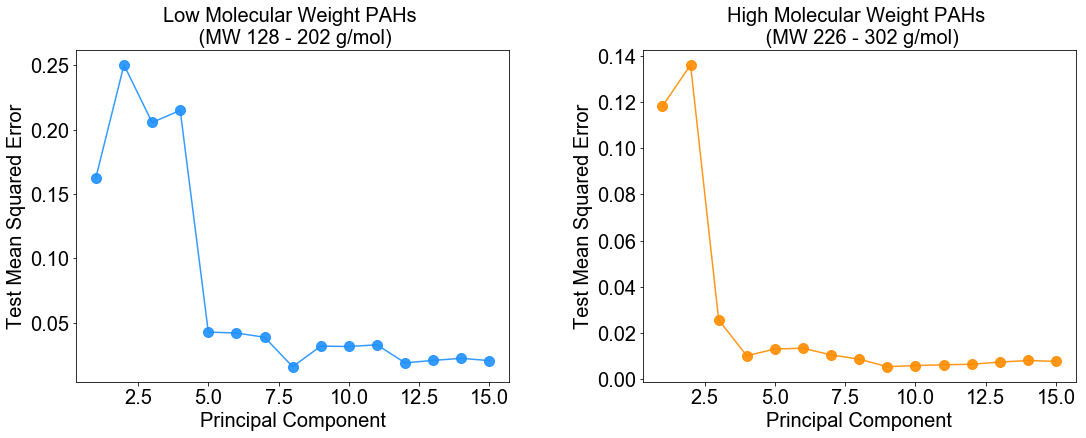

In [10]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['font.family'] = 'arial'

f12 = plt.figure(figsize=(15,6))
ax1 = f12.add_subplot(1,2,1)
# ax1.plot(range(1,16),err1_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,16),err1_test[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('Test Mean Squared Error',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
# ax1.legend(['Test'],fontsize=12,loc=1)
ax1.set_title('Low Molecular Weight PAHs \n (MW 128 - 202 g/mol)',fontsize=20)
plt.tight_layout()

ax1 = f12.add_subplot(1,2,2)
# ax1.plot(range(1,16),err2_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,16),err2_test[:,0],markersize=10,marker="o",c='darkorange',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('Test Mean Squared Error',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
# ax1.legend(['Test'],fontsize=12,loc=1)
ax1.set_title('High Molecular Weight PAHs \n (MW 226 - 302 g/mol)',fontsize=20)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=5)

f12.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\IGFR PCR\\MSE.png', bbox_inches='tight',dpi=300)



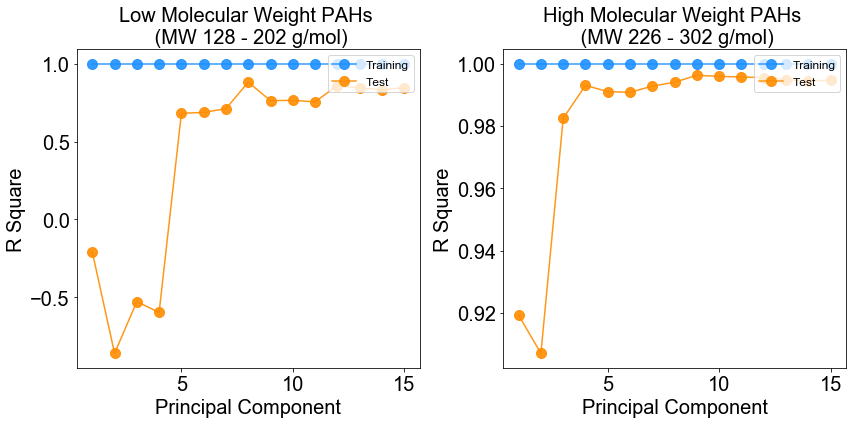

In [11]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['font.family'] = 'arial'

f12 = plt.figure(figsize=(12,6))
ax1 = f12.add_subplot(1,2,1)
ax1.plot(range(1,16),Rsq1_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,16),Rsq1_test[:,0],markersize=10,marker="o",c='darkorange',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('R Square',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
ax1.legend(['Training','Test'],fontsize=12,loc=1)
ax1.set_title('Low Molecular Weight PAHs \n (MW 128 - 202 g/mol)',fontsize=20)
plt.tight_layout()

ax1 = f12.add_subplot(1,2,2)
ax1.plot(range(1,16),Rsq2_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,16),Rsq2_test[:,0],markersize=10,marker="o",c='darkorange',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('R Square',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
ax1.legend(['Training','Test'],fontsize=12,loc=1)
ax1.set_title('High Molecular Weight PAHs \n (MW 226 - 302 g/mol)',fontsize=20)
plt.tight_layout()


[0.99314527 0.99852899 0.99932148 0.99975466 0.99990577 0.99993985
 0.99996732 0.99998271 0.99998705 0.99998975 0.99999218 0.99999406
 0.99999549 0.99999671 0.99999769 0.9999984  0.99999907 0.99999959
 1.         1.        ]


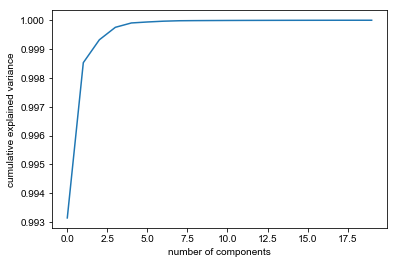

In [12]:
pca_dim_LMW = 5
pca_dim_HMW = 4

Ypred1_train = np.zeros(Y1.shape)
Ypred2_train = np.zeros(Y2.shape)

Ypred1_test = np.zeros(Y1.shape)
Ypred2_test = np.zeros(Y2.shape)

M = X.mean(0)
X_dmean = X - np.array([M,]*20)

pca = PCA()  
scores = pca.fit_transform(X_dmean)  
comps = pca.components_
D = pca.explained_variance_

print(np.cumsum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

regr = linear_model.LinearRegression()
x1 = scores[:,:pca_dim_LMW]
x2 = scores[:,:pca_dim_HMW]
y1 = Y1
y2 = Y2

# Y1
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(x1,y1)
Ypred1_train = lm1.predict(x1)

# Y2
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(x2,y2)
Ypred2_train = lm2.predict(x2)

for i in range(Y1[:,0].size):

    # Split x into training set and validation set 
    X_train = np.delete(X, i, 0)
    X_val = X[i]
    X_val = np.reshape(X_val,(1,X_val.size))

    # Demean X_train and X_val
    M = X_train.mean(0)
    X_train_dmean = X_train - np.array([M,]*19)
    X_val_dmean = X_val - M

    # Transform X_train_dmean to PC space
    pca = PCA()  
    scores = pca.fit_transform(X_train_dmean)  
    comps = pca.components_
    D = pca.explained_variance_

    # Transform X_test_dmean to PC space
    scores_test = pca.transform(X_val_dmean)  

    # Defining training and validation x and y
    regr = linear_model.LinearRegression()
    xtrain1 = scores[:,:pca_dim_LMW]
    xtrain2 = scores[:,:pca_dim_HMW]
    ytrain1 = np.delete(Y1, i, 0)
    ytrain2 = np.delete(Y2, i, 0)
    xtest1 = scores_test[:,:pca_dim_LMW]
    xtest2 = scores_test[:,:pca_dim_HMW]
    ytest1 = Y1[i]
    ytest2 = Y2[i]

    # Fit linear model on training data
    lm1 = linear_model.LinearRegression()
    model1 = lm1.fit(xtrain1,ytrain1)
    lm2 = linear_model.LinearRegression()
    model2 = lm2.fit(xtrain2,ytrain2)

    # Predict validation data using fitted model 
    Ypred1_test[i] = lm1.predict(xtest1)
    Ypred2_test[i] = lm2.predict(xtest2)

In [13]:
# Plot parity plots for prediction of each of the 16 compounds

def parity_plots(y_test, pred_test,
                 y_train=None, pred_train=None,
                titles = None):
    """Make parity plots for  16 regression outputs
    **In the future make it so any number of parity plots can be accomidate
    Args:
        y_test (np.array): expected values for test dataset 
            (shape = samples X values, currently expected as samples X 16) 
        pred_test (np.array): predicted values from test dataset
        y_train (np.array, optional): expected values from test dataset 
        pred_test (np.array, optional): predicted values from test dataset
        titles (list of strings, optional) : list of strings to use as tiles on plots
    
    Returns:
        fig: (matplotlib.figure.Figure) : Parity Plots
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    from sklearn.metrics import r2_score
    
   
    # Define colors for test and train
    # http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=3
    c_low = [55 / 255, 126 / 255, 184 / 255]
    c_high = [228 / 255, 26 / 255, 28 / 255]
    c_train = [77 / 255, 175 / 255, 74 / 255]
       
    fig = plt.figure(figsize=(18, 9))
    
    outer = gridspec.GridSpec(1, 2, wspace=0.5, hspace=0.2)
    
    
    # Generate a parity plot for each class using a loop
    for i in range(0, pred_test.shape[1]):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                        subplot_spec=outer[i], wspace=0.1, hspace=0.4,
                                                height_ratios=[3,1])
        
        #first axis - parity plot
        ax = plt.Subplot(fig, inner[0])
        
        # calculate appropriate scale for x and y axis
        maximums = [np.max(pred_test[:, i]), np.max(y_test[:, i])] 
        minimums = [np.min(pred_test[:, i]), np.min(y_test[:, i])]
        ax_max = np.max(maximums)
        ax_min = np.min(minimums)
        ax_range = ax_max - ax_min
        #add some padding so no data are on the edges
        ax_max = ax_max + ax_range*.25
        ax_min = ax_min - ax_range*.25

        # add the training data to the plot
        if y_train is None:
            pass
        else:
            ax.scatter(y_train[:, i], pred_train[:, i], color=c_train, s=100)
            
        # plot the test data
        # select blue color for low MW, select red color for high MW
        if i<1:
            color = c_low
        else:
            color = c_high
        ax.scatter(y_test[:, i], pred_test[:, i], color=color, s=100)
        # add perfect prediction line
        ax.plot([ax_min, ax_max], [ax_min, ax_max], color='k',
                 label='Perfect Prediction', linewidth=1)
        
        ax.set_ylim(ax_min, ax_max)
        ax.set_xlim(ax_min, ax_max)
        ax.set_xlabel('Measured GCMS Concentration \n (ng PAH/$\mu$g-soot)', fontsize=20)
        ax.set_ylabel('Estimated Concentration using EEM \n (ng PAH/$\mu$g-soot)', fontsize=20)
        ax.tick_params(labelsize=20)
        if titles is None:
            pass
        else:
            ax.set_title(titles[i], fontsize=20, weight='bold')
        # add an option for putting a letter on each plot later
        #         # add letters to each plot
        #         letter = ['A', 'B', 'C']
        #         bbox_props = dict(boxstyle="round, pad=0.1", fc="white", ec="white", lw=2)
        #         plt.text(-0.5, 6.5, letter[i], ha="center", va="center",
        #             size=20,
        #             bbox=bbox_props)     
        fig.add_subplot(ax)
        
        ######## Put R^2 values in the second panel below the plot #########
        ax = plt.Subplot(fig, inner[1])
        
        # Calulate and report R^2 train if training data provided
        if y_train is None:
            pass
        else:
            r2_train = r2_score(y_train[:, i], pred_train[:, i])
            t = ax.text(0.5,0.5, '$R^2$ train = %.3f' % r2_train, size=20)
            t.set_ha('center')
        
        # Calulate and report R^2 test
        r2_test = r2_score(y_test[:, i], pred_test[:, i])
        t = ax.text(0.5, 0.2, '$R^2$ test = %.3f' % r2_test, size=20)
        t.set_ha('center')
        fig.add_subplot(ax)
        
        #hide the axis
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.axis('off')

    return fig



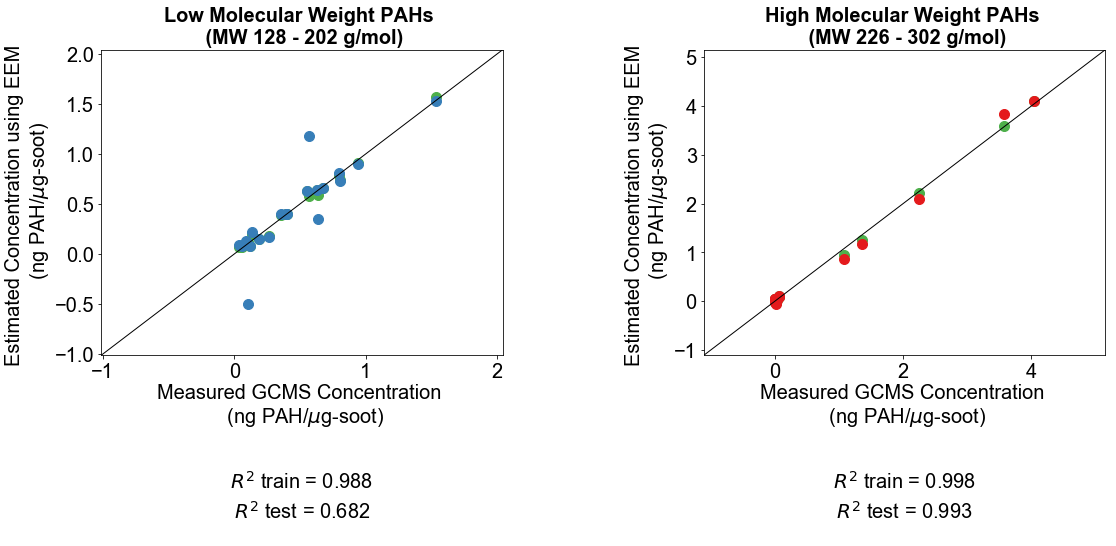

In [14]:
titles = ['Low Molecular Weight PAHs \n (MW 128 - 202 g/mol)','High Molecular Weight PAHs \n (MW 226 - 302 g/mol)']

ytest = np.zeros((20,2))
ytest[:,0] = Y1[:,0]
ytest[:,1] = Y2[:,0]

ypred_test = np.zeros((20,2))
ypred_test[:,0] = Ypred1_test[:,0]
ypred_test[:,1] = Ypred2_test[:,0]

ytrain = np.zeros((20,2))
ytrain[:,0] = Y1[:,0]
ytrain[:,1] = Y2[:,0]

ypred_train = np.zeros((20,2))
ypred_train[:,0] = Ypred1_train[:,0]
ypred_train[:,1] = Ypred2_train[:,0]

fig = parity_plots( \
                   y_test=ytest, \
                   pred_test=ypred_test, \
                   y_train=ytrain, \
                   pred_train = ypred_train, 
                   titles=titles)

fig.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\IGFR PCR\\PCR.png', bbox_inches='tight',dpi=300)


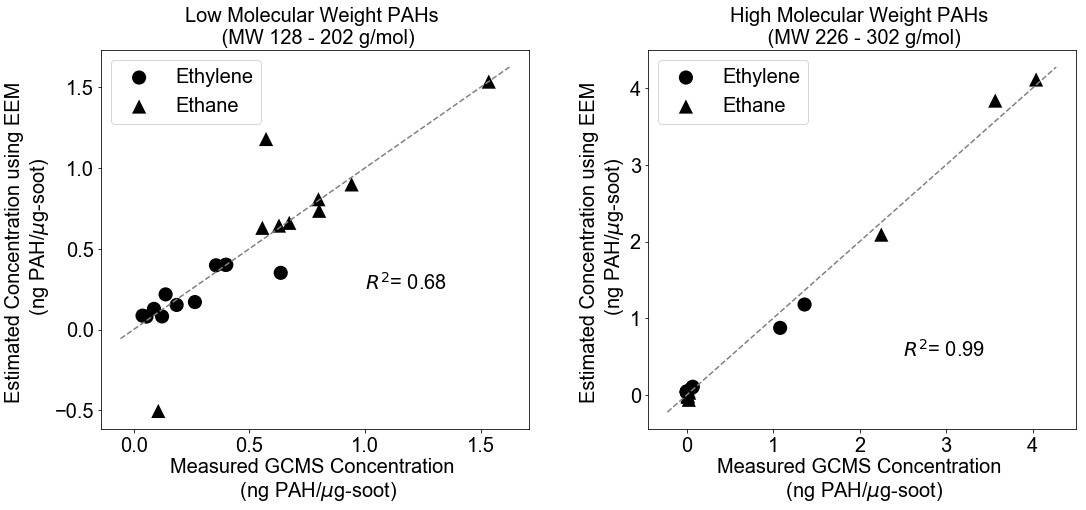

In [15]:
def abline(slope, intercept,col):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',c=col)


f14 = plt.figure(figsize=(15,7))
ax1 = f14.add_subplot(1,2,1)
ax1.scatter(y1[:11],Ypred1_test[:11],s=200,marker="o",c='k',edgecolors='none')
ax1.scatter(y1[11:],Ypred1_test[11:],s=200,marker="^",c='k',edgecolors='none')
ax1.set_ylabel('Estimated Concentration using EEM \n (ng PAH/$\mu$g-soot)',fontsize=20)
ax1.set_xlabel('Measured GCMS Concentration \n (ng PAH/$\mu$g-soot)',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.text(1, 0.25, r'$R^2$= %.4s' %Rsq1_test[pca_dim_LMW-1,0], fontsize=20)
ax1.set_title('Low Molecular Weight PAHs \n (MW 128 - 202 g/mol)', fontsize=20,
              #fontweight='bold'
             )
ax1.legend(['Ethylene','Ethane'],fontsize=20)
abline(1,0,'gray')
#print(r'y1fit=(%.1e)S1+(%.1e)S2+(%.1e)S3+(%.1e)S4+(%.1e)S5+(%.1e)' %(w1[0], w1[1], w1[2], w1[3], w1[4],b1))


ax2 = f14.add_subplot(1,2,2)
ax2.scatter(y2[:11],Ypred2_test[:11],s=200,marker="o",c='k',edgecolors='none')
ax2.scatter(y2[11:],Ypred2_test[11:],s=200,marker="^",c='k',edgecolors='none')
ax2.set_ylabel('Estimated Concentration using EEM \n (ng PAH/$\mu$g-soot)',fontsize=20)
ax2.set_xlabel('Measured GCMS Concentration \n (ng PAH/$\mu$g-soot)',fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.text(2.5, 0.5, r'$R^2$= %.4s' %Rsq2_test[pca_dim_HMW-1,0], fontsize=20)
ax2.set_title('High Molecular Weight PAHs \n (MW 226 - 302 g/mol)', fontsize=20,
              #fontweight='bold'
             )
ax2.legend(['Ethylene','Ethane'],fontsize=20)
abline(1,0,'gray')
#print(r'y2fit=(%.1e)S1+(%.1e)S2+(%.1e)S3+(%.1e)S4+(%.1e)S5+(%.1e)' %(w2[0], w2[1], w2[2], w2[3], w2[4],b2))


plt.tight_layout(pad=0.4, w_pad=5, h_pad=5)
#f14.savefig('./v4 Figures/LinearFit.png',bbox_inches='tight',dpi=300)
plt.show()

f14.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\IGFR PCR\\PCR_Ethane_Ethylene.png', bbox_inches='tight',dpi=300)


In [16]:
Ypred1_test

array([[ 0.40005619],
       [ 0.40047078],
       [ 0.12791702],
       [ 0.08021278],
       [ 0.08592036],
       [ 0.15211807],
       [ 0.08124464],
       [ 0.35057852],
       [ 0.21744021],
       [ 0.17001195],
       [ 0.3973584 ],
       [ 0.65979127],
       [ 0.62890744],
       [ 0.73424372],
       [ 0.6426333 ],
       [ 0.89725113],
       [ 1.53265449],
       [ 0.80567414],
       [-0.50317564],
       [ 1.17797065]])

In [17]:
Ypred1_train

array([[0.39890863],
       [0.3992915 ],
       [0.12203061],
       [0.07247464],
       [0.07498234],
       [0.15399631],
       [0.08409569],
       [0.59261034],
       [0.20088328],
       [0.17707493],
       [0.39355053],
       [0.66198247],
       [0.62481977],
       [0.74375541],
       [0.64204495],
       [0.90587441],
       [1.56462742],
       [0.78645243],
       [0.11704063],
       [0.57463601]])

In [18]:
Ypred2_train

array([[ 0.09348617],
       [ 0.10441896],
       [ 0.02999529],
       [ 0.03942316],
       [ 0.0378583 ],
       [ 0.03482041],
       [ 0.04120899],
       [ 1.24740671],
       [ 0.94164242],
       [ 0.03414696],
       [ 0.03029192],
       [ 0.02823827],
       [ 0.04986607],
       [-0.01457206],
       [-0.00639727],
       [-0.01922567],
       [-0.02715088],
       [ 3.58835014],
       [ 2.21134025],
       [ 4.10745803]])

In [19]:
# Importing Woodsmoke and Diesel Samples

test_files = pd.read_excel('../2019-11-09 Diesel Woodsmoke GCMS Diluted2 Samples/TestSamplesData.xlsx')
test_eem_data = np.zeros((test_files.shape[0],1000,201))

j=0
for file in test_files['filename'].to_list():
    test_eem_data[j,:,:] = np.genfromtxt("../2019-11-09 Diesel Woodsmoke GCMS Diluted2 Samples/" + file, dtype=float, delimiter=',') 
    j=j+1
    
test_ex = np.genfromtxt("../2019-11-09 Diesel Woodsmoke GCMS Diluted2 Samples/ex_woodsmoke.csv", dtype=float, delimiter=',')
test_em = np.genfromtxt("../2019-11-09 Diesel Woodsmoke GCMS Diluted2 Samples/em_woodsmoke.csv", dtype=float, delimiter=',')

In [20]:
test_files

,Index,filename,Sample ID
0,0,EEF-199_eem.csv,EEF-199
1,1,EEF-200_eem.csv,EEF-200
2,2,EEF-201_eem.csv,EEF-201
3,3,EEF-213_eem.csv,EEF-213
4,4,EEF-214_eem.csv,EEF-214
5,5,EEF-215_eem.csv,EEF-215
6,6,EEF-216_eem.csv,EEF-216
7,7,LB-HL4-01_eem.csv,LB-HL4-01
8,8,LB-HL4-10_eem.csv,LB-HL4-10


In [21]:
def em_interpolation(eem):
    intp_eem = np.zeros(eem.shape)
    intp_eem[8:,:] = eem[:-8,:]
    return intp_eem

In [22]:
for j in range(test_eem_data.shape[0]):
    test_eem_data[j,:,:] = em_interpolation(test_eem_data[j,:,:])

In [23]:
def view_eems(ex,em,eems):
    import matplotlib.ticker as ticker
    
    def myfmt(x, pos):
        return '{0:.1f}'.format(x)
    
    import math
    fig = plt.figure(figsize=(4*3.5,math.ceil((eems.shape[0])/3)*3.5))
    sams = [0,1,2,3,7,8,4,5,6]
    titles = ['Diesel','Diesel','Diesel',\
              'Woodsmoke\nForced Draft','Woodsmoke\nNatural Draft','Woodsmoke\nNatural Draft',\
             'Woodsmoke\nNatural Draft','Woodsmoke\nForced Draft','Woodsmoke\nForced Draft']
    j=0
    for i in sams:
        ax = fig.add_subplot(math.ceil((eems.shape[0])/3),3,j+1)
        fl = eems[i]
        cont = ax.contourf(ex, em, fl)       
        ax.set_xlim([220,500])
        ax.set_ylim([250,600])
        ttl = ax.set_title(titles[i],fontsize=16)
        ax.set_ylabel('$\lambda_{em}$ (nm)',fontsize=16)
        ax.set_xlabel('$\lambda_{ex}$ (nm)',fontsize=16)
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        cbar = fig.colorbar(cont, spacing='proportional',format=ticker.FuncFormatter(myfmt))
        cbar.ax.set_ylabel('Intensity (R.U.)',fontsize=16)
        cbar.ax.tick_params(axis='y',labelsize=16)
        for label in cbar.ax.yaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        j=j+1
    plt.tight_layout(pad=0.4, w_pad=1, h_pad=2)

    return fig

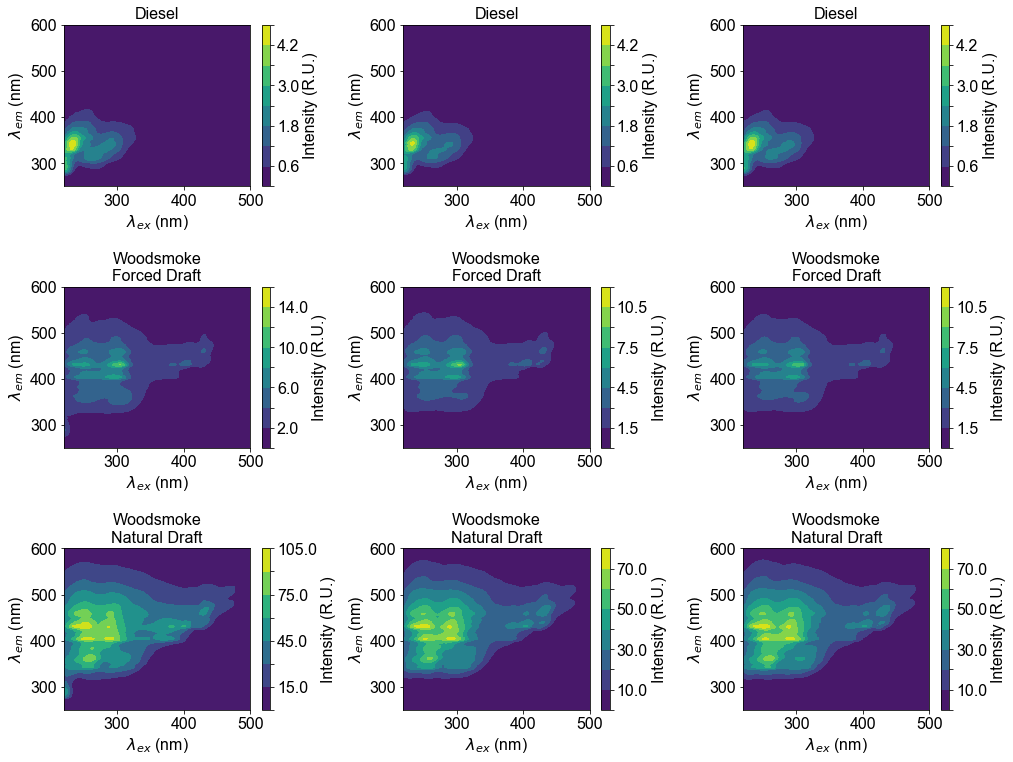

In [24]:
fig = view_eems(Ex,Em,test_eem_data)
fig.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\EEMs.png', bbox_inches='tight')


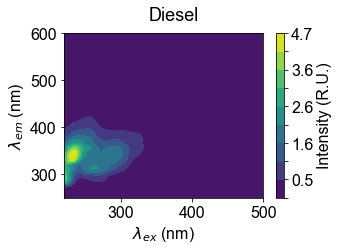

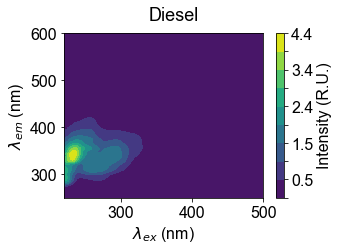

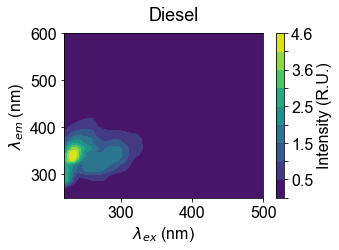

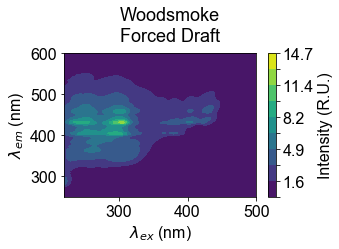

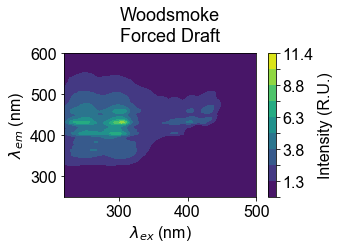

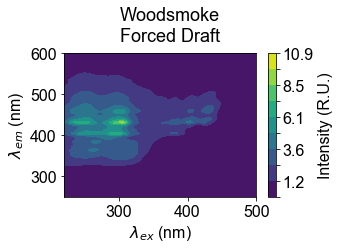

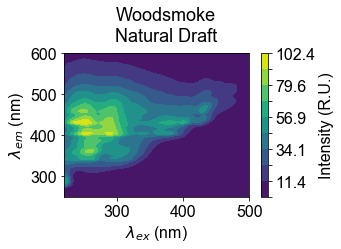

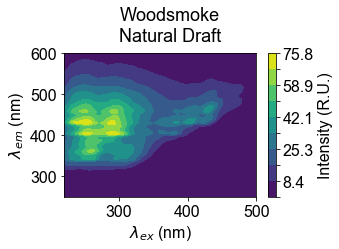

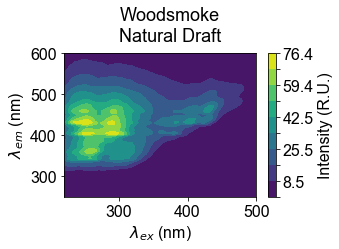

In [25]:
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

def myfmt(x, pos):
    return '{0:.1f}'.format(x)

EthSamples = [0,1,2,3,7,8,4,5,6]
titles = ['Diesel','Diesel','Diesel',\
              'Woodsmoke\nForced Draft','Woodsmoke\nNatural Draft','Woodsmoke\nNatural Draft',\
             'Woodsmoke\nNatural Draft','Woodsmoke\nForced Draft','Woodsmoke\nForced Draft']


for i in range(size(EthSamples)):
    import numpy as np
    f4 = plt.figure(figsize=(4.8,3.6))
    levels=linspace(test_eem_data[EthSamples[i]].min(),test_eem_data[EthSamples[i]].max(),10)
    ax = f4.add_subplot(1,1,1)
    eem = test_eem_data[EthSamples[i]]
    cont = ax.contourf(Ex,Em,eem,levels)
    ax.set_xlim([220,500])
    ax.set_ylim([250,600])
    ttl = ax.set_title(titles[EthSamples[i]],fontsize=18,
                       #fontweight='bold'
                      )
    ttl.set_position([0.55, 1.04])
    ax.set_ylabel('$\lambda_{em}$ (nm)',fontsize=16)
    ax.set_xlabel('$\lambda_{ex}$ (nm)',fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = f4.colorbar(cont, spacing='proportional',format=ticker.FuncFormatter(myfmt))
    cbar.ax.set_ylabel('Intensity (R.U.)',fontsize=16)
    cbar.ax.tick_params(axis='y',labelsize=16)
    for label in cbar.ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
        
    plt.tight_layout()
        
    f4.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\EEM_Sample%s.png' %i)

In [26]:
test_eem_data[0].min()

0.0

In [27]:
# Importing GCMS data for test samples

test_GCMS_diesel_data = pd.read_csv("../GCMS Data/GCMS_diesel.csv", delimiter=',')
test_GCMS_woodsmoke_data = pd.read_csv("../GCMS Data/GCMS_woodsmoke.csv", delimiter=',')
test_GCMS_data = pd.concat([test_GCMS_diesel_data, test_GCMS_woodsmoke_data])


In [28]:
# Left Join GCMS data on samples data 
test_GCMS_data_merged = test_files.join(test_GCMS_data.set_index('Sample ID'),
                 on='Sample ID', 
                 how='left')

In [29]:
test_GCMS_data_merged

,Index,filename,Sample ID,Unnamed: 0,Naphthalene (ng PAH/ug soot),Acenaphthylene (ng PAH/ug soot),Fluorene (ng PAH/ug soot),Phenanthrene (ng PAH/ug soot),Anthracene (ng PAH/ug soot),Fluoranthene (ng PAH/ug soot),Pyrene (ng PAH/ug soot),"Cyclopenta[c,d]pyrene (ng PAH/ug soot)",Benzo[a]anthracene (ng PAH/ug soot),Chrysene (ng PAH/ug soot),Benzofluoranthenes (ng PAH/ug soot),Benzo[a]pyrene (ng PAH/ug soot),"Indeno[1,2,3-cd]pyrene (ng PAH/ug soot)","Benzo[g,h,i]perylene (ng PAH/ug soot)",Coronene (ng PAH/ug soot),Dibenzopyrenes (ng PAH/ug soot)
0,0,EEF-199_eem.csv,EEF-199,1,0.002390,0.004716,0.001679,0.010623,0.003706,0.020023,0.040717,0.006477,0.002347,0.002884,0.006534,0.002977,0.001649,0.001265,0.000154,0.006215
1,1,EEF-200_eem.csv,EEF-200,2,0.001727,0.005086,0.001753,0.010090,0.004061,0.016251,0.037983,0.006477,0.002240,0.002175,0.006502,0.002969,0.001518,0.001254,0.000080,0.005756
2,2,EEF-201_eem.csv,EEF-201,3,0.001871,0.005153,0.001699,0.009413,0.004438,0.020653,0.038961,0.006668,0.001810,0.002561,0.006574,0.002893,0.001469,0.001167,0.000126,0.005384
3,3,EEF-213_eem.csv,EEF-213,5,0.003550,0.017028,0.004939,0.015238,0.012555,0.021249,0.019039,0.118919,0.054154,0.073290,0.397334,0.199638,0.174846,0.248120,0.027828,0.131043
4,4,EEF-214_eem.csv,EEF-214,6,0.016741,0.025991,0.011565,0.213383,0.086326,2.635781,2.967673,6.670449,1.551919,1.741853,3.506064,1.885023,1.432650,1.534298,0.191127,0.851795
5,5,EEF-215_eem.csv,EEF-215,7,0.006763,0.013520,0.007467,0.239353,0.089883,2.314667,2.540220,5.106429,1.171237,1.321959,2.693025,1.463951,1.070812,1.132451,0.123293,0.589115
6,6,EEF-216_eem.csv,EEF-216,8,0.006771,0.013635,0.007598,0.257154,0.094973,2.448954,2.699732,5.474696,1.233869,1.346967,2.756828,1.449631,1.113137,1.209860,0.135584,0.566908
7,7,LB-HL4-01_eem.csv,LB-HL4-01,9,0.001252,0.006239,0.001643,0.000908,0.003671,0.005971,0.005031,0.055864,0.021524,0.033208,0.277348,0.161027,0.144467,0.205740,0.017920,0.059233
8,8,LB-HL4-10_eem.csv,LB-HL4-10,10,0.001264,0.007108,0.002045,0.000949,0.004193,0.006144,0.004911,0.057012,0.022330,0.034507,0.258131,0.165266,0.119210,0.196259,0.015445,0.055528


In [30]:
Y1_test = np.zeros((test_GCMS_data_merged.shape[0],1))
Y2_test = np.zeros((test_GCMS_data_merged.shape[0],1))
Y_test = np.zeros((test_GCMS_data_merged.shape[0],16))


Y1_test[:,0] = np.array(test_GCMS_data_merged.iloc[:,4:11].sum(axis=1))
Y2_test[:,0] = np.array(test_GCMS_data_merged.iloc[:,11:].sum(axis=1))
Y_test[:,:] = np.array(test_GCMS_data_merged.iloc[:,4:])

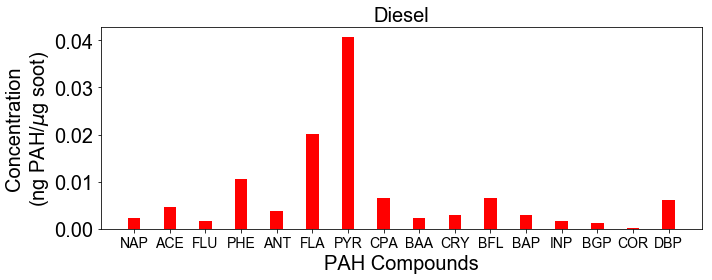

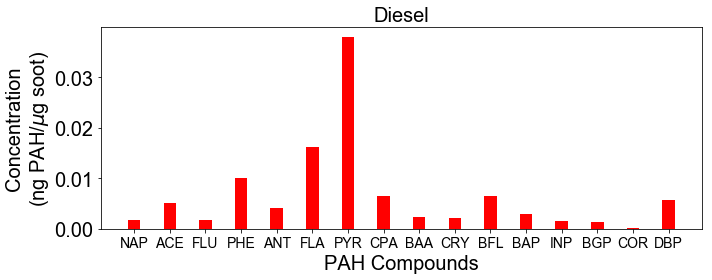

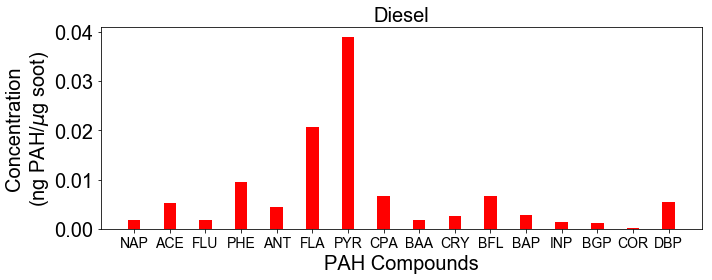

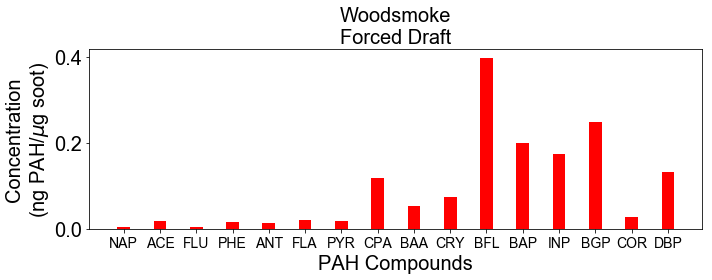

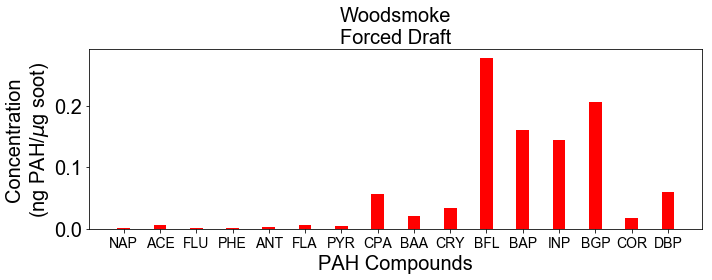

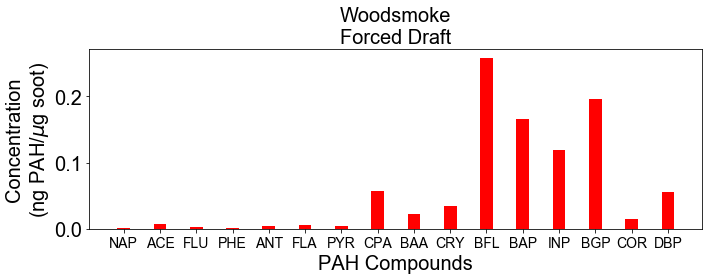

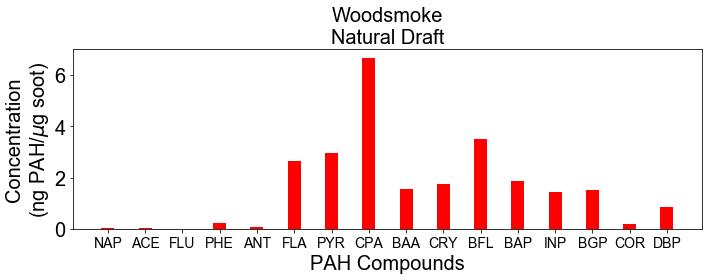

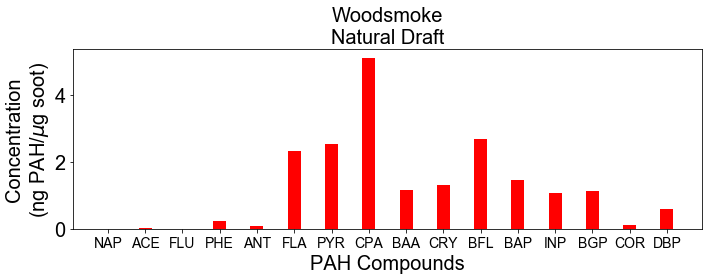

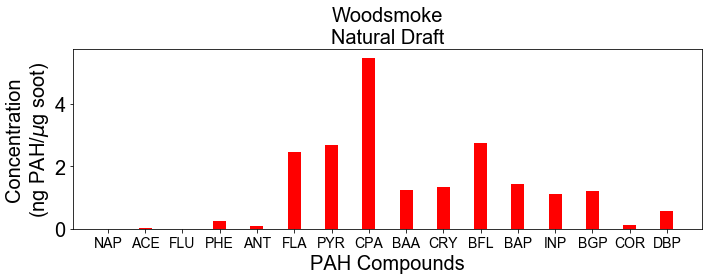

In [31]:
EthSamples = [0,1,2,3,7,8,4,5,6]
titles = ['Diesel','Diesel','Diesel',\
              'Woodsmoke\nForced Draft','Woodsmoke\nNatural Draft','Woodsmoke\nNatural Draft',\
             'Woodsmoke\nNatural Draft','Woodsmoke\nForced Draft','Woodsmoke\nForced Draft']

xtck = ['NAP','ACE','FLU','PHE', 'ANT', 'FLA', 'PYR',
          'CPA','BAA','CRY','BFL','BAP','INP',
         'BGP','COR','DBP']

for i in range(size(EthSamples)):
    f2 = plt.figure(figsize=(10,4))
    ax = f2.add_subplot(1,1,1)
    df2 = ax.bar(np.arange(16),Y_test[EthSamples[i],:],0.35,color='red',label='Test Samples Original')
    ax.set_ylabel('Concentration\n(ng PAH/$\mu$g soot)',fontsize=20)
    ax.set_xlabel('PAH Compounds',fontsize=20)
    ax.set_xticks(np.arange(16))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xticklabels(xtck, fontsize=14)
    ax.set_title(titles[EthSamples[i]],fontsize=20,
                       #fontweight='bold'
                      )
    plt.tight_layout()
    f2.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\GCMS_Sample%s.png' %i)

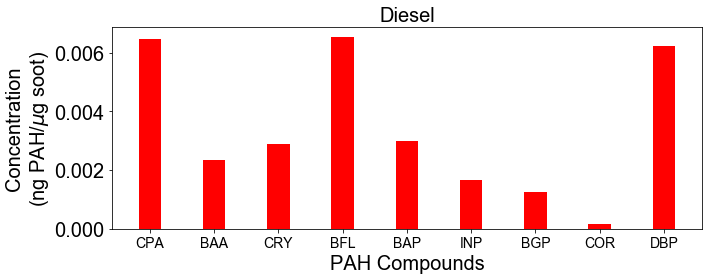

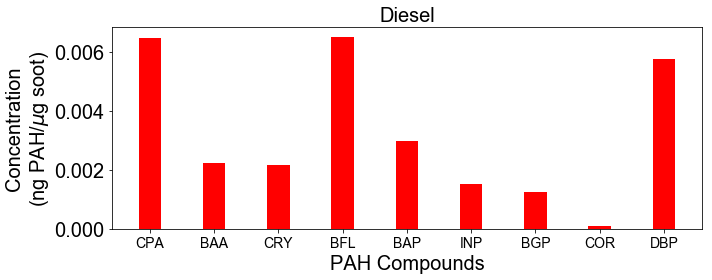

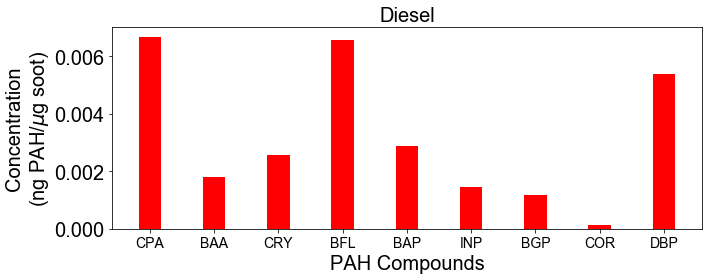

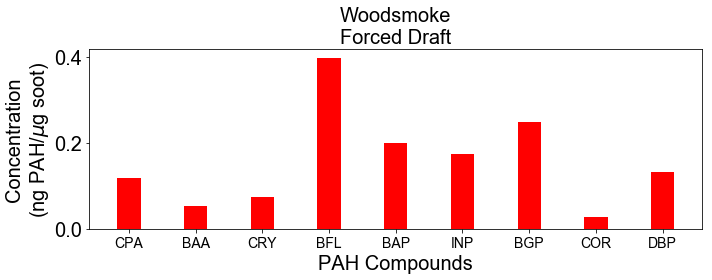

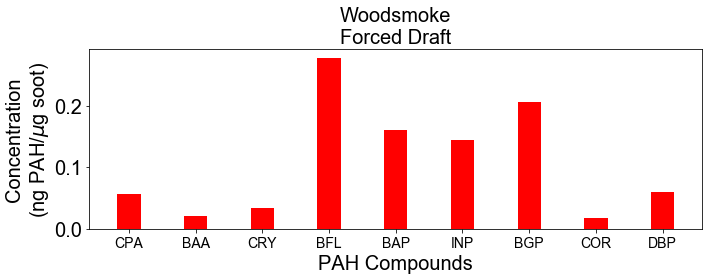

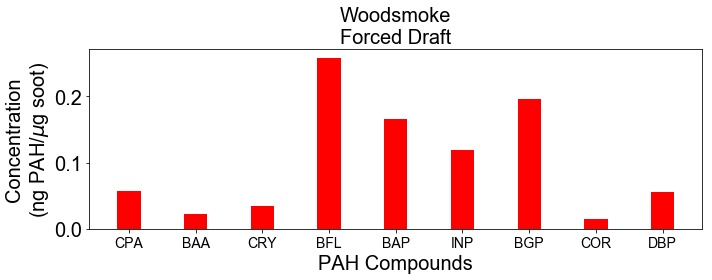

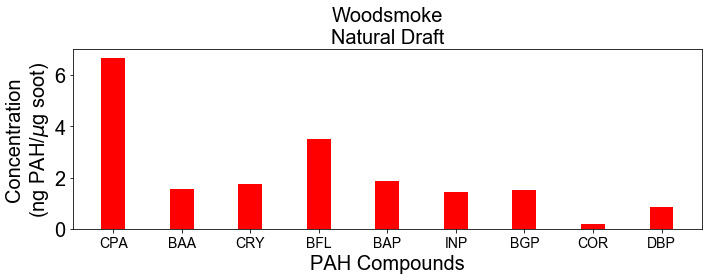

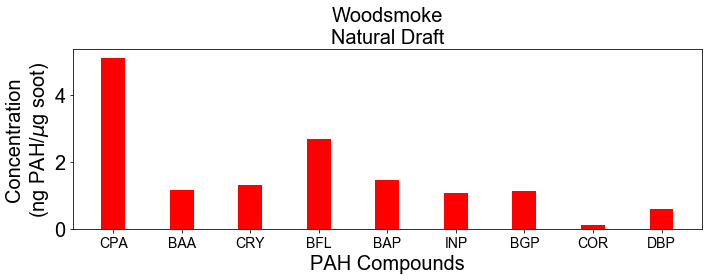

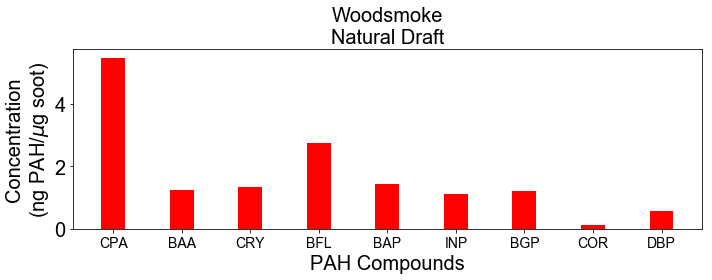

In [32]:
EthSamples = [0,1,2,3,7,8,4,5,6]
titles = ['Diesel','Diesel','Diesel',\
              'Woodsmoke\nForced Draft','Woodsmoke\nNatural Draft','Woodsmoke\nNatural Draft',\
             'Woodsmoke\nNatural Draft','Woodsmoke\nForced Draft','Woodsmoke\nForced Draft']

xtck = ['NAP','ACE','FLU','PHE', 'ANT', 'FLA', 'PYR',
          'CPA','BAA','CRY','BFL','BAP','INP',
         'BGP','COR','DBP']

for i in range(size(EthSamples)):
    f2 = plt.figure(figsize=(10,4))
    ax = f2.add_subplot(1,1,1)
    df2 = ax.bar(np.arange(9),Y_test[EthSamples[i],7:],0.35,color='red',label='Test Samples Original')
    ax.set_ylabel('Concentration\n(ng PAH/$\mu$g soot)',fontsize=20)
    ax.set_xlabel('PAH Compounds',fontsize=20)
    ax.set_xticks(np.arange(9))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xticklabels(xtck[7:], fontsize=14)
    ax.set_title(titles[EthSamples[i]],fontsize=20,
                       #fontweight='bold'
                      )
    plt.tight_layout()
    f2.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke Data Augmentation\\WS_d_HMW_GCMS_Sample%s.png' %i)

In [33]:
# Load 20 samples and their labels
X = np.zeros((20,201000))
Y1 = np.zeros((20,1))
Y2 = np.zeros((20,1))
Y = np.zeros((20,16))

for i in range(20):
    j=i+1
    s = np.genfromtxt("../20samples Original/Sample%s.csv" %j, dtype=float, delimiter=',') 
    X[i,:] = np.reshape(s,(1,201000))
    
Ynorm = pd.read_csv("../20samples Original/Normalized PAH Conc ng_ug 5_13_2019.csv", delimiter=',')
    
# Y1[:20,0] = np.genfromtxt("./20labels Original/LMW20samples.csv", dtype=float, delimiter=',') 
# Y2[:20,0] = np.genfromtxt("./20labels Original/HMW20samples.csv", dtype=float, delimiter=',') 
# Y[:20,:] = np.genfromtxt("./20labels Original/GCMS20samples.csv", dtype=float, delimiter=',') 

Y1[:20,0] = np.array(Ynorm.iloc[:,2:9].sum(axis=1))
Y2[:20,0] = np.array(Ynorm.iloc[:,9:].sum(axis=1))
Y[:20,:] = np.array(Ynorm.iloc[:,2:])

In [34]:
# Demean data

X_test = np.reshape(test_eem_data,(test_eem_data.shape[0],201000))
M = X.mean(0)
X_dmean = X - np.array([M,]*20)
X_test_dmean = X_test - np.array([M,]*test_eem_data.shape[0])

from sklearn.decomposition import PCA

pca = PCA()  
scores = pca.fit_transform(X_dmean)  
comps = pca.components_
D = pca.explained_variance_

pca_dim_LMW = 5
pca_dim_HMW = 4

# Transform X_test_dmean to PC space
scores_test = pca.transform(X_test_dmean)

# Defining training and validation x and y
xtrain1 = scores[:,:pca_dim_LMW]
xtrain2 = scores[:,:pca_dim_HMW]
ytrain1 = Y1
ytrain2 = Y2
xtest1 = scores_test[:,:pca_dim_LMW]
xtest2 = scores_test[:,:pca_dim_HMW]
ytest1 = Y1_test
ytest2 = Y2_test

# Fit linear model on training data
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(xtrain1,ytrain1)
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(xtrain2,ytrain2)


# Predict validation data using fitted model 
Ypred1_test = lm1.predict(xtest1)
Ypred2_test = lm2.predict(xtest2)

# Predict validation data using fitted model 
Ypred1_train = lm1.predict(xtrain1)
Ypred2_train = lm2.predict(xtrain2)

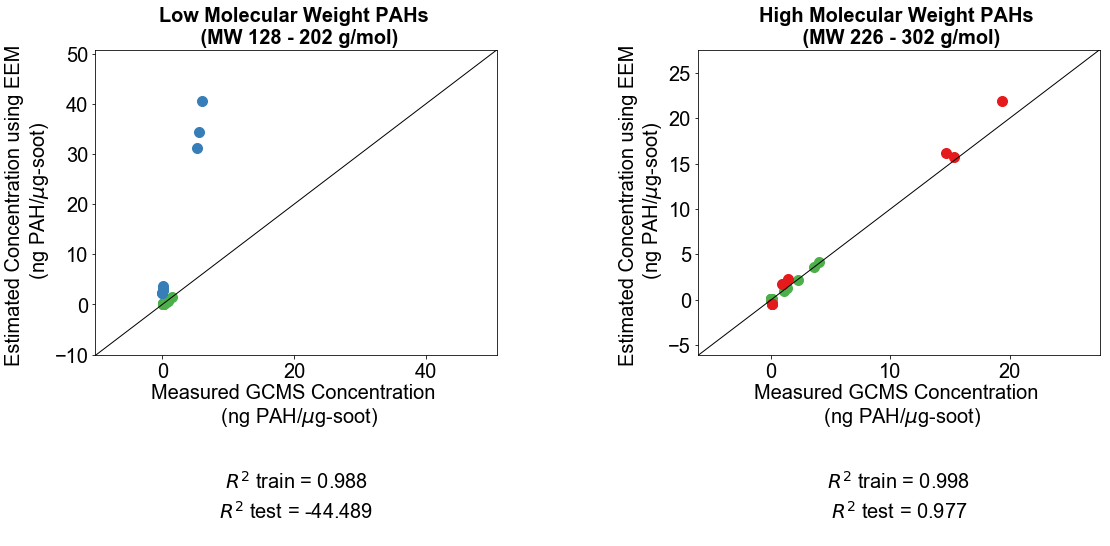

In [35]:
titles = ['Low Molecular Weight PAHs \n (MW 128 - 202 g/mol)','High Molecular Weight PAHs \n (MW 226 - 302 g/mol)']

ytest = np.zeros((9,2))
ytest[:,0] = Y1_test[:,0]
ytest[:,1] = Y2_test[:,0]

ypred_test = np.zeros((9,2))
ypred_test[:,0] = Ypred1_test[:,0]
ypred_test[:,1] = Ypred2_test[:,0]

ytrain = np.zeros((20,2))
ytrain[:,0] = Y1[:,0]
ytrain[:,1] = Y2[:,0]

ypred_train = np.zeros((20,2))
ypred_train[:,0] = Ypred1_train[:,0]
ypred_train[:,1] = Ypred2_train[:,0]

fig = parity_plots(y_test=ytest, pred_test=ypred_test, y_train=ytrain, pred_train = ypred_train, titles=titles)

fig.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\ParityPlot.png', bbox_inches='tight')


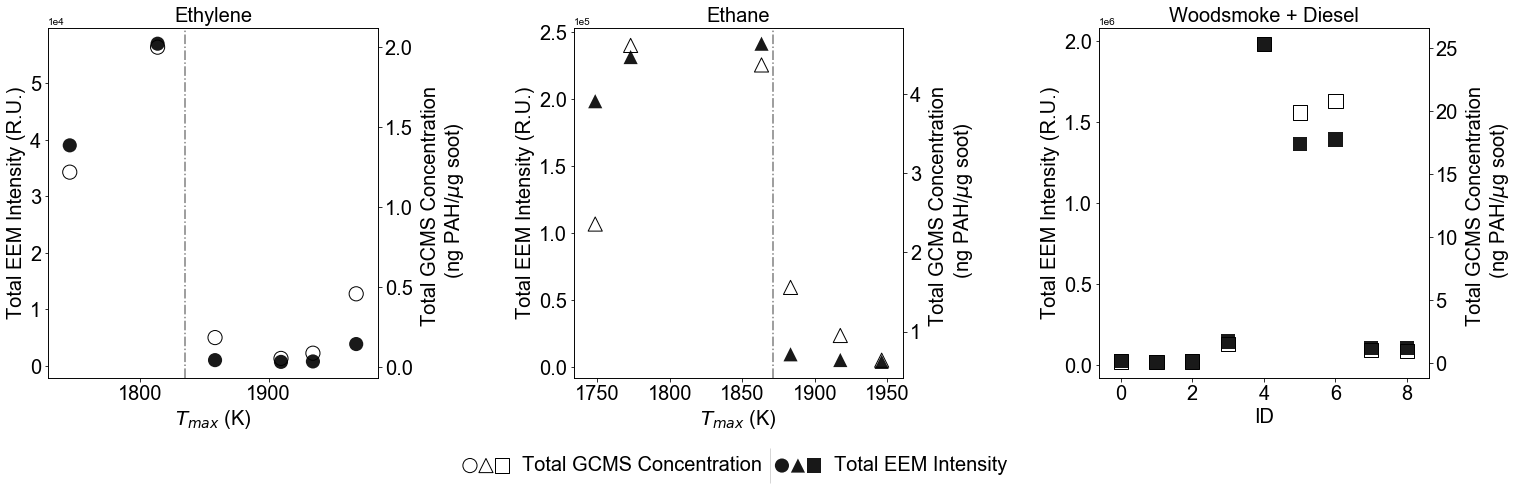

In [36]:
EthSamples = [0,2,3,5,7,8]

TF = np.zeros(size(EthSamples))
maxEEM = np.zeros(size(EthSamples))


for i in range(size(EthSamples)):
    TF[i] = np.sum(X[EthSamples[i],:])
    maxEEM[i] = np.max(X[EthSamples[i],:])

TGC = np.sum(Y,axis=1)
    
from matplotlib import rcParams
rcParams['font.family'] = 'arial'

import itertools
from scipy.interpolate import make_interp_spline, BSpline

x = SamplesInfo['Temp (K)'][EthSamples]
y = TF

from scipy.interpolate import interp1d

xnew = np.linspace(x.min(),x.max(),300)
f = interp1d(x, y, 1)
y_smooth=f(xnew)


f3 = plt.figure(figsize=(21,6))
ax = f3.add_subplot(1,3,1)
l1 = ax.scatter(SamplesInfo['Temp (K)'][EthSamples], TF,s=200,marker="o",c='k',alpha=0.9,edgecolors='none', label = 'EEM Intensity')
ax.set_xlabel(r'$T_{max}$ (K)',fontsize=20)
ax.set_ylabel('Total EEM Intensity (R.U.)',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax = ax.twinx()
l2 = ax.scatter(SamplesInfo['Temp (K)'][EthSamples], TGC[EthSamples],s=200,marker="o",edgecolors='k',facecolors='none', label = 'GCMS Conc.')
ax.set_ylabel('Total GCMS Concentration \n (ng PAH/$\mu$g soot)',fontsize=20,labelpad=10)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_title('Ethylene', fontsize=20)
ax.axvline(1835,linestyle='-.',color='gray')



EthSamples = [14,15,16,17,19,18]

TF = np.zeros(size(EthSamples))
maxEEM = np.zeros(size(EthSamples))

for i in range(size(EthSamples)):
    TF[i] = np.sum(X[EthSamples[i],:])
    maxEEM[i] = np.max(X[EthSamples[i],:])

ax = f3.add_subplot(1,3,2)
l3 = ax.scatter(SamplesInfo['Temp (K)'][EthSamples], TF,s=200,marker="^",c='k',alpha=0.9,edgecolors='none', label='EEM Intensity')
ax.set_xlabel(r'$T_{max}$ (K)',fontsize=20)
ax.set_ylabel('Total EEM Intensity (R.U.)',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax = ax.twinx()
l4 = ax.scatter(SamplesInfo['Temp (K)'][EthSamples], TGC[EthSamples],s=200,marker="^",edgecolors='k',facecolors='none', label='GCMS Conc.')
ax.set_ylabel('Total GCMS Concentration \n (ng PAH/$\mu$g soot)',fontsize=20,labelpad=10)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.axvline(1871,linestyle='-.',color='gray')
ax.set_title('Ethane', fontsize=20)


TGC = np.sum(Y_test,axis=1)
WSD = [0,1,2,3,4,5,6,7,8]
TF = np.zeros(size(WSD))
maxEEM = np.zeros(size(WSD))

for i in range(size(WSD)):
    TF[i] = np.sum(X_test[WSD[i],:])
    maxEEM[i] = np.max(X_test[WSD[i],:])

ax = f3.add_subplot(1,3,3)
l5 = ax.scatter(test_GCMS_data_merged['Index'][WSD], TF,s=200,marker="s",c='k',alpha=0.9,edgecolors='none', label='EEM Intensity')
ax.set_xlabel(r'ID',fontsize=20)
ax.set_ylabel('Total EEM Intensity (R.U.)',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax = ax.twinx()
l6 = ax.scatter(test_GCMS_data_merged['Index'][WSD], TGC[WSD],s=200,marker="s",edgecolors='k',facecolors='none', label='GCMS Conc.')
ax.set_ylabel('Total GCMS Concentration \n (ng PAH/$\mu$g soot)',fontsize=20,labelpad=10)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_title('Woodsmoke + Diesel', fontsize=20)



from matplotlib.legend_handler import HandlerLine2D

handles = [(l1,l3,l5), (l2,l4,l6)]

plt.tight_layout(pad=0.4, w_pad=5, h_pad=5)

lgd = ax.legend(handles = handles, labels=['Total EEM Intensity','Total GCMS Concentration'], 
          handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)},loc='upper center', 
             bbox_to_anchor=(-1, -0.2),fancybox=False, shadow=False, ncol=3, mode="expand", borderaxespad=0., prop={'size': 20})

plt.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\TotalFluorescence.png',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)

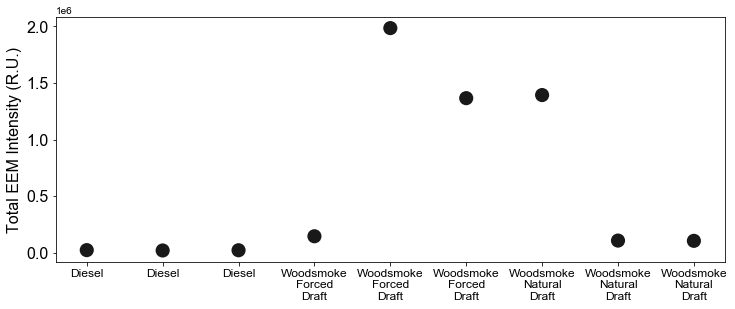

In [37]:
TGC = np.sum(Y_test,axis=1)
EthSamples = [14,15,16,17,19,18]
TF = np.zeros(size(WSD))
maxEEM = np.zeros(size(WSD))

labels = ['Diesel','Diesel','Diesel', \
         'Woodsmoke\nForced\nDraft','Woodsmoke\nForced\nDraft','Woodsmoke\nForced\nDraft',\
         'Woodsmoke\nNatural\nDraft','Woodsmoke\nNatural\nDraft','Woodsmoke\nNatural\nDraft']

for i in range(size(WSD)):
    TF[i] = np.sum(X_test[WSD[i],:])
    maxEEM[i] = np.max(X_test[WSD[i],:])

f3 = plt.figure(figsize=(12,4.5))
ax = f3.add_subplot(1,1,1)

l5 = ax.scatter(np.array([0,1,2,3,4,5,6,7,8]), TF,s=200,marker="o",c='k',alpha=0.9,edgecolors='none', label='EEM Intensity')
# ax.set_xlabel(r'ID',fontsize=20)
ax.set_ylabel('Total EEM Intensity (R.U.)',fontsize=16)
ax.set_xticks(np.array([0,1,2,3,4,5,6,7,8]))
ax.set_xticklabels(labels)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax = ax.twinx()
# l6 = ax.scatter(test_GCMS_data_merged['Index'][WSD], TGC[WSD],s=200,marker="o",edgecolors='k',facecolors='none', label='GCMS Conc.')
# ax.set_ylabel('Total GCMS Concentration \n (ng PAH/$\mu$g soot)',fontsize=20,labelpad=10)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=16)
# ax.set_title('Diesel and Woodsmoke', fontsize=16)
plt.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\WS_D_TotalFluorescence.png',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)

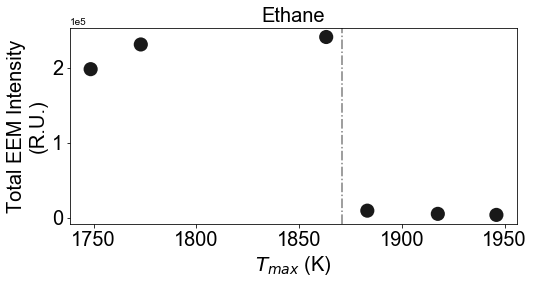

In [38]:

EthSamples = [14,15,16,17,19,18]

TF = np.zeros(size(EthSamples))
maxEEM = np.zeros(size(EthSamples))

for i in range(size(EthSamples)):
    TF[i] = np.sum(X[EthSamples[i],:])
    maxEEM[i] = np.max(X[EthSamples[i],:])

f3 = plt.figure(figsize=(8,3.6))
ax = f3.add_subplot(1,1,1)

l5 = ax.scatter(SamplesInfo['Temp (K)'][EthSamples], TF,s=200,marker="o",c='k',alpha=0.9,edgecolors='none', label='EEM Intensity')
ax.set_xlabel(r'$T_{max}$ (K)',fontsize=20)
ax.set_ylabel('Total EEM Intensity\n(R.U.)',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.axvline(1871,linestyle='-.',color='gray')
ax.set_title('Ethane', fontsize=20)
# ax = ax.twinx()
# l6 = ax.scatter(test_GCMS_data_merged['Index'][WSD], TGC[WSD],s=200,marker="o",edgecolors='k',facecolors='none', label='GCMS Conc.')
# ax.set_ylabel('Total GCMS Concentration \n (ng PAH/$\mu$g soot)',fontsize=20,labelpad=10)
# ax.set_title('Diesel and Woodsmoke', fontsize=16)
plt.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\Ethane_TotalFluorescence.png',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)

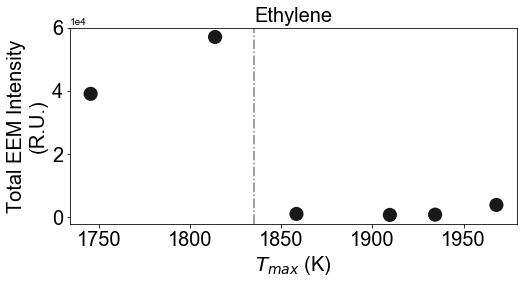

In [39]:

EthSamples = [0,2,3,5,7,8]

TF = np.zeros(size(EthSamples))
maxEEM = np.zeros(size(EthSamples))

for i in range(size(EthSamples)):
    TF[i] = np.sum(X[EthSamples[i],:])
    maxEEM[i] = np.max(X[EthSamples[i],:])

f3 = plt.figure(figsize=(8,3.6))
ax = f3.add_subplot(1,1,1)

l5 = ax.scatter(SamplesInfo['Temp (K)'][EthSamples], TF,s=200,marker="o",c='k',alpha=0.9,edgecolors='none', label='EEM Intensity')
ax.set_xlabel(r'$T_{max}$ (K)',fontsize=20)
ax.set_ylabel('Total EEM Intensity\n(R.U.)',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.axvline(1835,linestyle='-.',color='gray')
ax.set_title('Ethylene', fontsize=20)
# ax = ax.twinx()
# l6 = ax.scatter(test_GCMS_data_merged['Index'][WSD], TGC[WSD],s=200,marker="o",edgecolors='k',facecolors='none', label='GCMS Conc.')
# ax.set_ylabel('Total GCMS Concentration \n (ng PAH/$\mu$g soot)',fontsize=20,labelpad=10)
# ax.set_title('Diesel and Woodsmoke', fontsize=16)
plt.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\Ethylene_TotalFluorescence.png',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=300)

In [40]:
np.array(test_GCMS_data_merged['Index'][WSD].to_list())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [41]:
# Demean data

X_test = np.reshape(test_eem_data,(test_eem_data.shape[0],201000))
M = X.mean(0)
X_dmean = X - np.array([M,]*20)
X_test_dmean = X_test - np.array([M,]*test_eem_data.shape[0])

X_all = np.zeros((X.shape[0]+X_test.shape[0],201000))
X_all[:X.shape[0]] = X
X_all[X.shape[0]:] = X_test

Y_all = np.zeros((Y.shape[0]+Y_test.shape[0],16))
Y_all[:Y.shape[0]] = Y
Y_all[Y.shape[0]:] = Y_test

Y1_all = np.zeros((Y1.shape[0]+Y1_test.shape[0],1))
Y1_all[:Y1.shape[0]] = Y1
Y1_all[Y1.shape[0]:] = Y1_test

Y2_all = np.zeros((Y2.shape[0]+Y2_test.shape[0],1))
Y2_all[:Y2.shape[0]] = Y2
Y2_all[Y2.shape[0]:] = Y2_test

Need to do 3 fold CV

In [42]:
# 3 fold CV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

splits = 3

kf = KFold(n_splits=splits, shuffle=False)
kf.get_n_splits(X_all)

pcdim = 20


Rsq1_train = np.zeros((pcdim,1))
Rsq2_train = np.zeros((pcdim,1))
Rsq1_test = np.zeros((pcdim,1))
Rsq2_test = np.zeros((pcdim,1))

err1_train = np.zeros((pcdim,1))
err2_train = np.zeros((pcdim,1))
err1_test = np.zeros((pcdim,1))
err2_test = np.zeros((pcdim,1))


for j in range(pcdim):
    
    i=0
    
    Ypred1_train = np.zeros(Y1_all.shape)
    Ypred2_train = np.zeros(Y2_all.shape)
    
    Ypred1_test = np.zeros(Y1_all.shape)
    Ypred2_test = np.zeros(Y2_all.shape)
    
    M = X_all.mean(0)
    X_dmean = X_all - np.array([M,]*29)

    pca = PCA()  
    scores = pca.fit_transform(X_dmean)  
    comps = pca.components_
    D = pca.explained_variance_

    pca_dim = pcdim

    regr = linear_model.LinearRegression()
    x_train = scores[:,:pca_dim]
    y1 = Y1_all
    y2 = Y2_all

    # Y1
    lm1 = linear_model.LinearRegression()
    model1 = lm1.fit(x_train,y1)
    Ypred1_train = lm1.predict(x_train)
    
    # Y2
    lm2 = linear_model.LinearRegression()
    model2 = lm2.fit(x_train,y2)
    Ypred2_train = lm2.predict(x_train)

    for train_index, test_index in kf.split(X_all):

        print("TRAIN:", train_index, "TEST:", test_index)

        X_train, X_test = X_all[train_index], X_all[test_index]
        y1_train, y1_test = Y1_all[train_index], Y1_all[test_index]
        y2_train, y2_test = Y2_all[train_index], Y2_all[test_index]

        # Demean X_train and X_test
        M = X_train.mean(0)
        X_train_dmean = X_train - np.array([M,]*(X_train.shape[0]))
        X_test_dmean = X_test - M

        # Transform X_train_dmean to PC space
        pca = PCA()  
        scores = pca.fit_transform(X_train_dmean)  
        comps = pca.components_
        D = pca.explained_variance_

        # Transform X_test_dmean to PC space
        scores_test = pca.transform(X_test_dmean)  

        # Defining training and validation x and y
        regr = linear_model.LinearRegression()
        xtrain = scores[:,:j+1]
        xtest = scores_test[:,:j+1]

        # Fit linear model on training data
        lm1 = linear_model.LinearRegression()
        model1 = lm1.fit(xtrain,y1_train)
        lm2 = linear_model.LinearRegression()
        model2 = lm2.fit(xtrain,y2_train)

        # Predict validation data using fitted model 
        Ypred1_test[test_index] = lm1.predict(xtest)
        Ypred2_test[test_index] = lm2.predict(xtest)
        i=i+1
        
    Rsq1_train[j,0] = r2_score(Y1_all, Ypred1_train)
    Rsq1_test[j,0] = r2_score(Y1_all, Ypred1_test)
    Rsq2_train[j,0] = r2_score(Y2_all, Ypred2_train)
    Rsq2_test[j,0] = r2_score(Y2_all, Ypred2_test)
    
    err1_train[j,0] = np.sum(np.square(Ypred1_train - Y1_all))/29
    err1_test[j,0] = np.sum(np.square(Ypred1_test - Y1_all))/29
    err2_train[j,0] = np.sum(np.square(Ypred2_train - Y2_all))/29
    err2_test[j,0] = np.sum(np.square(Ypred2_test - Y2_all))/29

TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] TEST: [0 1 2 3 4 5 6 7 8 9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28] TEST: [10 11 12 13 14 15 16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22 23 24 25 26 27 28]
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] TEST: [0 1 2 3 4 5 6 7 8 9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28] TEST: [10 11 12 13 14 15 16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22 23 24 25 26 27 28]
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] TEST: [0 1 2 3 4 5 6 7 8 9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28] TEST: [10 11 12 13 14 15 16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22 23 24 25 26 27 28]
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] TEST: [0 1 2 3 4 5 6 7 8 9]


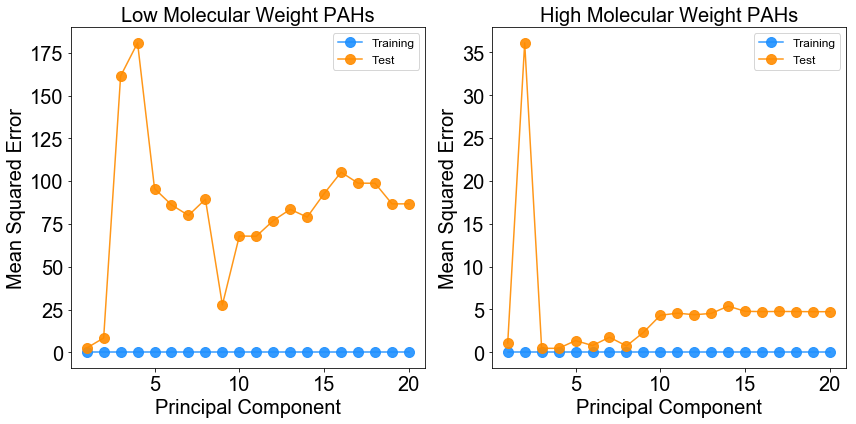

In [43]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['font.family'] = 'arial'

f12 = plt.figure(figsize=(12,6))
ax1 = f12.add_subplot(1,2,1)
ax1.plot(range(1,21),err1_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,21),err1_test[:,0],markersize=10,marker="o",c='darkorange',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('Mean Squared Error',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
ax1.legend(['Training','Test'],fontsize=12,loc=1)
ax1.set_title('Low Molecular Weight PAHs',fontsize=20)
plt.tight_layout()

ax1 = f12.add_subplot(1,2,2)
ax1.plot(range(1,21),err2_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,21),err2_test[:,0],markersize=10,marker="o",c='darkorange',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('Mean Squared Error',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
ax1.legend(['Training','Test'],fontsize=12,loc=1)
ax1.set_title('High Molecular Weight PAHs',fontsize=20)
plt.tight_layout()


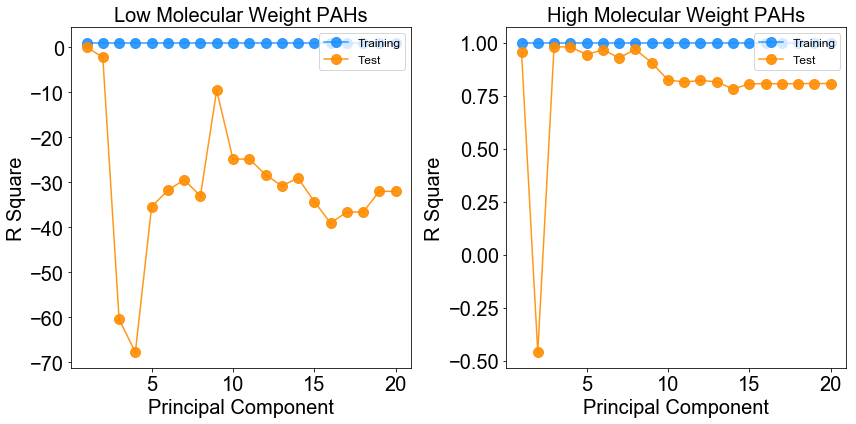

In [44]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['font.family'] = 'arial'

f12 = plt.figure(figsize=(12,6))
ax1 = f12.add_subplot(1,2,1)
ax1.plot(range(1,21),Rsq1_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,21),Rsq1_test[:,0],markersize=10,marker="o",c='darkorange',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('R Square',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
ax1.legend(['Training','Test'],fontsize=12,loc=1)
ax1.set_title('Low Molecular Weight PAHs',fontsize=20)
plt.tight_layout()

ax1 = f12.add_subplot(1,2,2)
ax1.plot(range(1,21),Rsq2_train[:,0],markersize=10,marker="o",c='dodgerblue',alpha=0.9)
ax1.plot(range(1,21),Rsq2_test[:,0],markersize=10,marker="o",c='darkorange',alpha=0.9)
ax1.set_xlabel('Principal Component',fontsize=20)
ax1.set_ylabel('R Square',fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
# ax1.set_ylim([0.9, 1.01])
ax1.legend(['Training','Test'],fontsize=12,loc=1)
ax1.set_title('High Molecular Weight PAHs',fontsize=20)
plt.tight_layout()


[0.98800462 0.99501174 0.99956121 0.99973976 0.99990122 0.99995487
 0.9999734  0.99998179 0.99998864 0.99999361 0.99999604 0.99999728
 0.99999803 0.99999861 0.99999911 0.99999946 0.99999965 0.99999973
 0.99999978 0.99999984 0.99999987 0.9999999  0.99999993 0.99999995
 0.99999996 0.99999998 0.99999999 1.         1.        ]
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28] TEST: [0 1 2 3 4 5 6 7 8 9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28] TEST: [10 11 12 13 14 15 16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22 23 24 25 26 27 28]


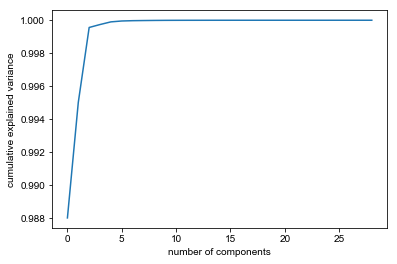

In [45]:
# 3 fold CV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

splits = 3

kf = KFold(n_splits=splits, shuffle=False)
kf.get_n_splits(X_all)

pc_dim_LMW = 5
pc_dim_HMW = 3
    
Ypred1_train = np.zeros(Y1_all.shape)
Ypred2_train = np.zeros(Y2_all.shape)

Ypred1_test = np.zeros(Y1_all.shape)
Ypred2_test = np.zeros(Y2_all.shape)

M = X_all.mean(0)
X_dmean = X_all - np.array([M,]*29)

pca = PCA()  
scores = pca.fit_transform(X_dmean)  
comps = pca.components_
D = pca.explained_variance_

print(np.cumsum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

regr = linear_model.LinearRegression()
x1 = scores[:,:pca_dim_LMW]
x2 = scores[:,:pca_dim_HMW]
y1 = Y1_all
y2 = Y2_all

# Y1
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(x1,y1)
Ypred1_train = lm1.predict(x1)

# Y2
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(x2,y2)
Ypred2_train = lm2.predict(x2)

for train_index, test_index in kf.split(X_all):

    print("TRAIN:", train_index, "TEST:", test_index)

    X_train, X_test = X_all[train_index], X_all[test_index]
    y1_train, y1_test = Y1_all[train_index], Y1_all[test_index]
    y2_train, y2_test = Y2_all[train_index], Y2_all[test_index]

    # Demean X_train and X_test
    M = X_train.mean(0)
    X_train_dmean = X_train - np.array([M,]*(X_train.shape[0]))
    X_test_dmean = X_test - M

    # Transform X_train_dmean to PC space
    pca = PCA()  
    scores = pca.fit_transform(X_train_dmean)  
    comps = pca.components_
    D = pca.explained_variance_

    # Transform X_test_dmean to PC space
    scores_test = pca.transform(X_test_dmean)  
    
    # Defining training and validation x and y
    regr = linear_model.LinearRegression()
    xtrain1 = scores[:,:pca_dim_LMW]
    xtrain2 = scores[:,:pca_dim_HMW]
    xtest1 = scores_test[:,:pca_dim_LMW]
    xtest2 = scores_test[:,:pca_dim_HMW]

    # Fit linear model on training data
    lm1 = linear_model.LinearRegression()
    model1 = lm1.fit(xtrain1,y1_train)
    lm2 = linear_model.LinearRegression()
    model2 = lm2.fit(xtrain2,y2_train)

    # Predict validation data using fitted model 
    Ypred1_test[test_index] = lm1.predict(xtest1)
    Ypred2_test[test_index] = lm2.predict(xtest2)

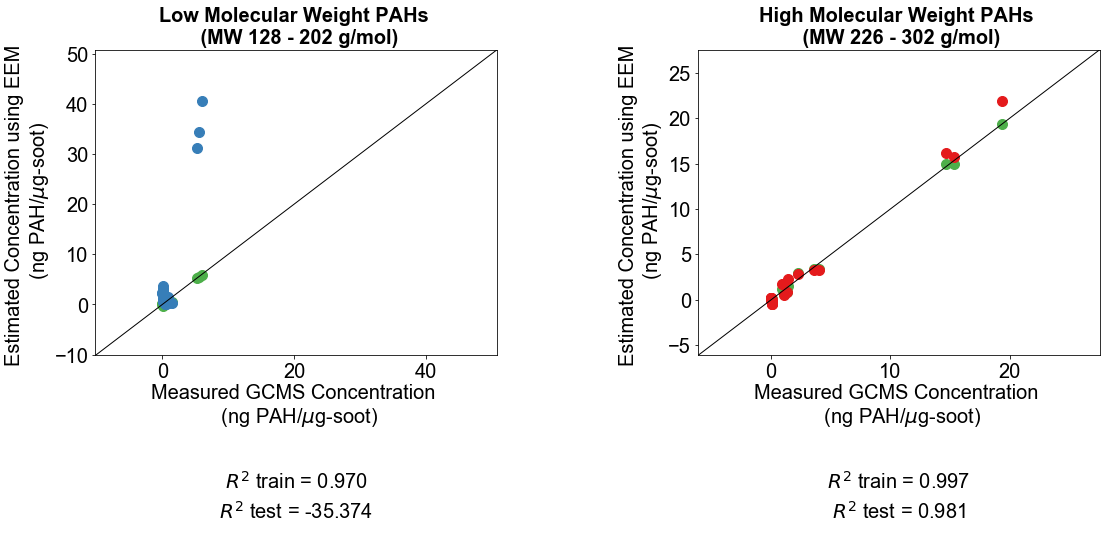

In [46]:
titles = ['Low Molecular Weight PAHs \n (MW 128 - 202 g/mol)','High Molecular Weight PAHs \n (MW 226 - 302 g/mol)']

ytest = np.zeros((29,2))
ytest[:,0] = Y1_all[:,0]
ytest[:,1] = Y2_all[:,0]

ypred_test = np.zeros((29,2))
ypred_test[:,0] = Ypred1_test[:,0]
ypred_test[:,1] = Ypred2_test[:,0]

ytrain = np.zeros((29,2))
ytrain[:,0] = Y1_all[:,0]
ytrain[:,1] = Y2_all[:,0]

ypred_train = np.zeros((29,2))
ypred_train[:,0] = Ypred1_train[:,0]
ypred_train[:,1] = Ypred2_train[:,0]

fig = parity_plots(y_test=ytest, pred_test=ypred_test, y_train=ytrain, pred_train = ypred_train, titles=titles)